In [49]:
import time
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
df = pd.read_csv('/home/nick/Downloads/Consistency_expectedIntensity_to_Nick.csv')[['consistency', 'intensity']]
df.head()

,consistency,intensity
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


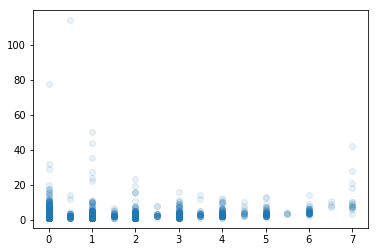

In [3]:
plt.scatter(df.consistency, df.intensity, alpha=.1)

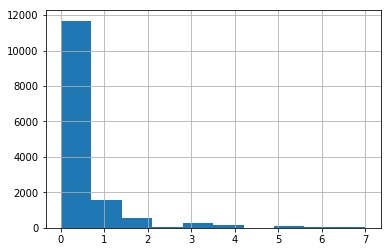

In [4]:
df.consistency.hist()

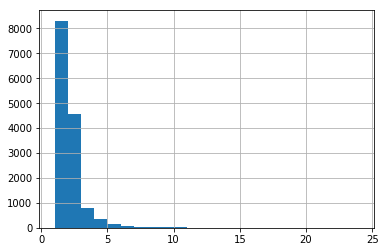

In [5]:
df.intensity.hist(bins=np.arange(1,25))

Look how right skewed these data are. We can try a log transform to get better results

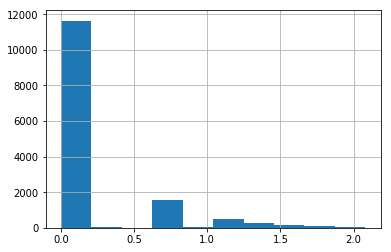

In [6]:
df.consistency.apply(lambda x: np.log(x+1)).hist()

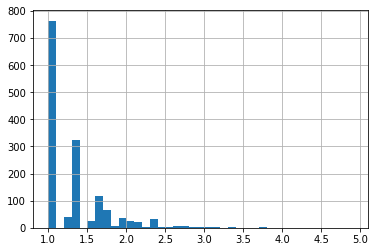

In [7]:
df.intensity.apply(lambda x: np.log(x)).hist(bins=np.arange(1,5,.1))

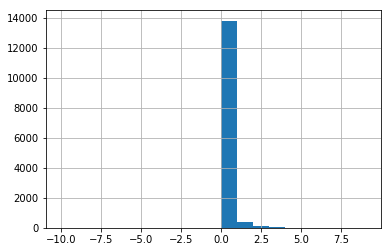

In [8]:
(df.intensity.apply(lambda x: np.log(x)) * df.consistency.apply(lambda x: np.log(x+1))).hist(bins=np.arange(-10,10))

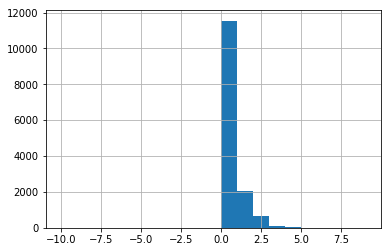

In [9]:
(df.intensity * (df.consistency+1)).apply(np.log).hist(bins=np.arange(-10,10))

In [10]:
df.describe()

,consistency,intensity
count,14376.000000,14376.000000
mean,0.344289,1.697795
std,0.896396,1.877581
min,0.000000,1.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,2.000000
max,7.000000,114.000000


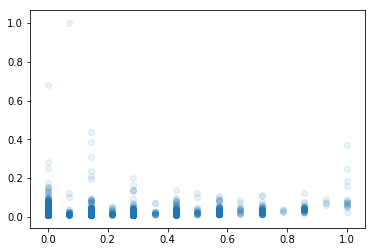

In [11]:
df_scaled = df/df.max()
plt.scatter(df_scaled.consistency, df_scaled.intensity, alpha=.1)

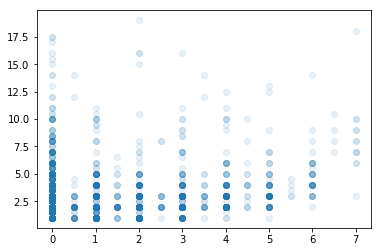

In [51]:
limits = df.apply(lambda x: np.percentile(x, 99.9), axis=0)

df_filtered = df[(df.consistency <= limits.consistency) & (df.intensity <= limits.intensity)]
df_scaled = (df_filtered-df_filtered.min())/df_filtered.max()
plt.scatter(df_filtered.consistency, df_filtered.intensity, alpha=.1)

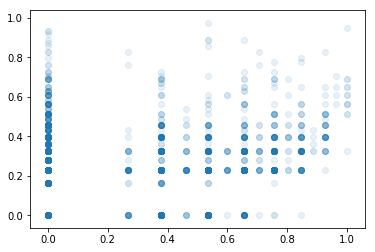

In [52]:
plt.scatter(*df_scaled.apply(np.sqrt).values.T, alpha=.1)

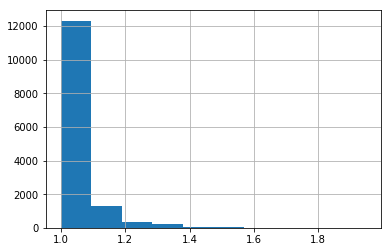

In [38]:
(df_scaled.apply(lambda row: np.sqrt((row.intensity+1)*(row.consistency+1)), axis=1)).hist()

In [39]:
from nltk.cluster.kmeans import KMeansClusterer
NUM_CLUSTERS = 3
data = df_scaled.values

def dist(x,y):
    edits_per_week1 = (x[1]+1)*(x[0]+1)
    edits_per_week2 = (y[1]+1)*(y[0]+1)
    return np.sqrt(np.abs(edits_per_week1-edits_per_week2))

kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=dist, repeats=25, avoid_empty_clusters=True)
assigned_clusters = kclusterer.cluster(data, assign_clusters=True)

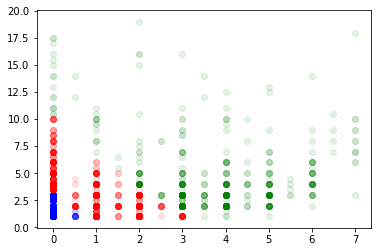

In [43]:
assigned_clusters = np.array(assigned_clusters, dtype=np.int8)
plt.scatter(df_filtered.consistency[assigned_clusters==0], df_filtered.intensity[assigned_clusters==0], alpha=.1, c='b')
plt.scatter(df_filtered.consistency[assigned_clusters==1], df_filtered.intensity[assigned_clusters==1], alpha=.1, c='r')
plt.scatter(df_filtered.consistency[assigned_clusters==2], df_filtered.intensity[assigned_clusters==2], alpha=.1, c='g')

In [44]:
for i in np.unique(assigned_clusters):
    print(np.sum(assigned_clusters == i))

11220
2499
642


In [45]:
from nltk.cluster.kmeans import KMeansClusterer
NUM_CLUSTERS = 4
data = df_scaled.apply(np.sqrt).values

def dist(x,y):
    return np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)

kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=dist, repeats=25, avoid_empty_clusters=True)
assigned_clusters = kclusterer.cluster(data, assign_clusters=True)

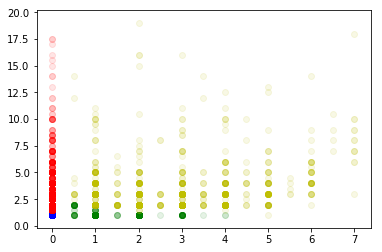

In [48]:
assigned_clusters = np.array(assigned_clusters, dtype=np.int8)
plt.scatter(df_filtered.consistency[assigned_clusters==0], df_filtered.intensity[assigned_clusters==0], alpha=.1, c='b')
plt.scatter(df_filtered.consistency[assigned_clusters==1], df_filtered.intensity[assigned_clusters==1], alpha=.1, c='r')
plt.scatter(df_filtered.consistency[assigned_clusters==2], df_filtered.intensity[assigned_clusters==2], alpha=.1, c='g')
plt.scatter(df_filtered.consistency[assigned_clusters==3], df_filtered.intensity[assigned_clusters==3], alpha=.1, c='y')

In [47]:
for i in np.unique(assigned_clusters):
    print(np.sum(assigned_clusters == i))

7135
4496
1022
1708
